# **Elastic-Net Regression**

Elastic Net Regression is a modification of Linear Regression. Linear Regression suffers from overfitting and can’t deal with collinear data. To deal with these issues, we include both L-2 and L-1 norm regularization benefits into one. <br>
The ridge regression equation is given as:
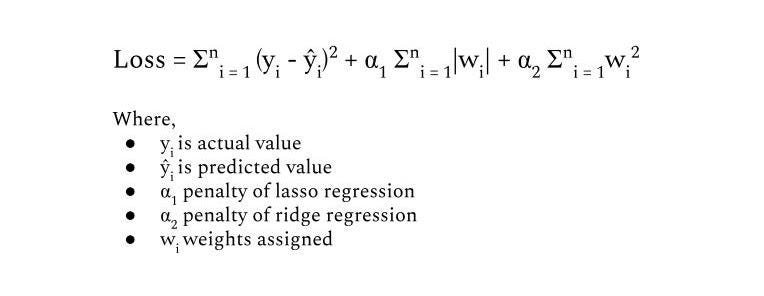

In [1]:
import numpy as np

class SimpleElasticNet:
    def __init__(self, alpha=1.0, l1_ratio=0.5, max_iter=1000, learning_rate=0.01, tol=1e-4):
        self.alpha = alpha  # Regularization strength
        self.l1_ratio = l1_ratio  # Balance between L1 and L2 penalty
        self.max_iter = max_iter  # Maximum number of iterations
        self.learning_rate = learning_rate  # Learning rate for gradient descent
        self.tol = tol  # Tolerance for the optimization
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.coef_ = np.zeros(n_features)
        self.intercept_ = 0

        # Reshape y to be a 1D array if it's 2D
        if y.ndim == 2:
            y = y.ravel()  # Flatten the y array if it's 2D

        for _ in range(self.max_iter):
            y_pred = np.dot(X, self.coef_) + self.intercept_
            residuals = y_pred - y

            # Calculate gradients
            coef_grad = (1 / n_samples) * np.dot(X.T, residuals) + self.alpha * (self.l1_ratio * np.sign(self.coef_) + (1 - self.l1_ratio) * self.coef_)
            intercept_grad = (1 / n_samples) * np.sum(residuals)

            prev_coef = self.coef_.copy()

            self.coef_ -= self.learning_rate * coef_grad
            self.intercept_ -= self.learning_rate * intercept_grad

            if np.sum(np.abs(self.coef_ - prev_coef)) < self.tol:
                break

    def predict(self, X):
        return np.dot(X, self.coef_) + self.intercept_

    def score(self, X, y):
        y_pred = self.predict(X)
        u = ((y - y_pred) ** 2).sum()
        v = ((y - y.mean()) ** 2).sum()
        return 1 - u/v

R2 Score: -1.1612082474296042


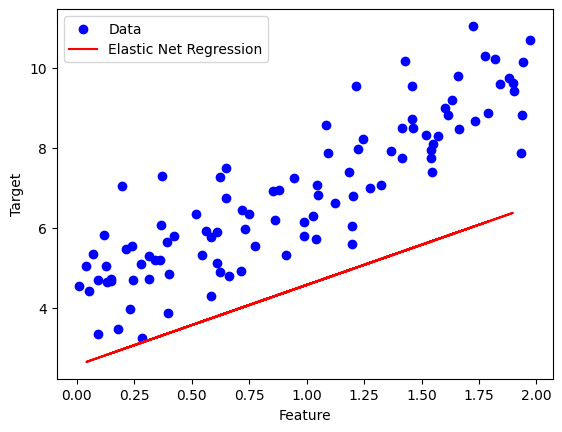

In [2]:
# testing a case
if __name__ == "__main__":
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import r2_score
    import matplotlib.pyplot as plt

    # Generate a simple dataset
    np.random.seed(42)
    X = 2 * np.random.rand(100, 1)
    y = 4 + 3 * X + np.random.randn(100, 1)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    enet = SimpleElasticNet(alpha=1.0, l1_ratio=0.5, max_iter=1000,learning_rate=0.01, tol=0.01)
    enet.fit(X_train, y_train)

    y_pred = enet.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    print(f'R2 Score: {r2}')

    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X_test, y_pred, color='red', label='Elastic Net Regression')
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.legend()
    plt.show()